# HW 5 - PCA and SVD
As usual, you are permited to work in groups of up to 4. Please indicate who you worked with. 

This HW will be worth 2X what the other homeworks have been counted as. Due date will be Sunday at 11:59. Upload the saved file to gauchospace as *firstname_lastname-HW5.ipynb*

Good Luck!


#### Question 1: Exploring Gene Space
Imagine that we are doing a set of experiments on yeast cells to understand how they respond to environmental perturbations.

Consider the data matrix X below where each row corresponds to a gene (call them gene 1 and gene 2), and each column
corresponds to an assay (an experimental condition). Let’s say the first five columns are assays every 10 min following heat shock, and the second five columns are assays every 10 min following a shift from glucose to glycerol.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[0, 2, 4, 8, 10, 0, 3, 6, 7.5, 10],[.5, 1, 1.8, 2.4, 3, 5, 3.3, 2, .9, 0]])

X

array([[ 0. ,  2. ,  4. ,  8. , 10. ,  0. ,  3. ,  6. ,  7.5, 10. ],
       [ 0.5,  1. ,  1.8,  2.4,  3. ,  5. ,  3.3,  2. ,  0.9,  0. ]])

#### Question 1.1
Plot the data points in gene 1 - gene 2 space.

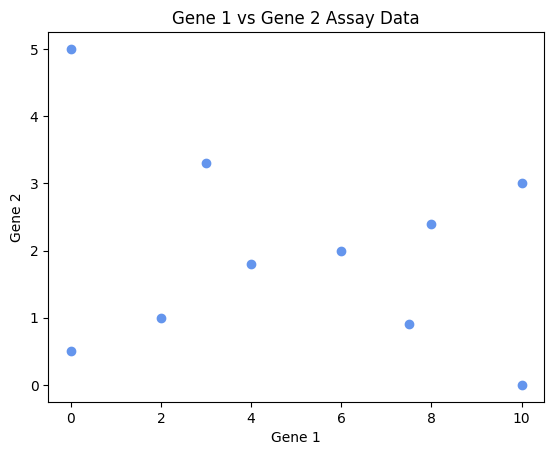

In [4]:
# plot the data for both genes

plt.plot(X[0, :], X[1, :], 'o', color = 'cornflowerblue')
plt.title('Gene 1 vs Gene 2 Assay Data')
plt.xlabel('Gene 1')
plt.ylabel('Gene 2')
plt.show()



#### Question 1.2
What is the mean expression value for each gene?

In [5]:
X_mean = np.mean(X, axis = 1)
print(f'Mean Expression Value for Gene 1: {X_mean[0]:.2f}\nMean Expression Value for Gene 2: {X_mean[1]:.2f}')

Mean Expression Value for Gene 1: 5.05
Mean Expression Value for Gene 2: 1.99


#### Question 1.3
What is the variance of the expression value for each gene?

In [6]:
X_var = np.var(X, axis = 1)
print(f'Variance of the Expression Value for Gene 1: {X_var[0]:.2f}\nVariance of the Expression Value for Gene 2: {X_var[1]:.2f}')

Variance of the Expression Value for Gene 1: 13.02
Variance of the Expression Value for Gene 2: 2.03


#### Question 1.4
Plot the four time courses (2 genes X 2 conditions) as a function of time with the first measurments being time 0 all on the same plot. What can you say about the how the genes are correlated in their responses to these perturbations?

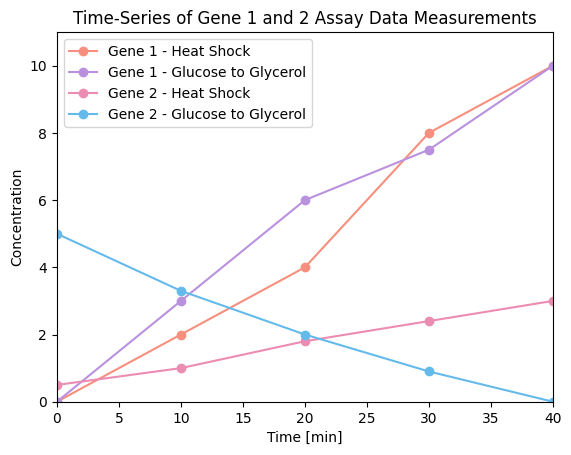

The above results indicate that gene 1 is more susceptible to the uptake of glycerol following heat shock. That is, gene 1 is likely involved in the uptake of glycerol, whereas gene 2 responds fatally to the environmental perturbation.


In [12]:
# split data based on conidtions for each gene
X_split = np.array([X[0,:5], X[0,5:], X[1,:5], X[1,5:]])

# define time for the x-axis using new parameters
time = np.linspace(0, 40, 5)

# plot all four sets of data
plt.plot(time, X_split[0, :], '-o', color = '#f68f7d')
plt.plot(time, X_split[1, :], '-o', color = '#ba91df')
plt.plot(time, X_split[2, :], '-o', color = '#ed8cb3')
plt.plot(time, X_split[3, :], '-o', color = '#64baeb')

plt.title('Time-Series of Gene 1 and 2 Assay Data Measurements')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.xlim((0,40))
plt.ylim((0,11))
plt.legend(['Gene 1 - Heat Shock', 'Gene 1 - Glucose to Glycerol', 'Gene 2 - Heat Shock', 'Gene 2 - Glucose to Glycerol'])
plt.show()

print('The above results indicate that gene 1 is more susceptible to the uptake of glycerol following heat shock. That is, gene 1 is likely involved in the uptake of glycerol, whereas gene 2 responds fatally to the environmental perturbation.')

#### Question 2: PCA on a data matrix
Perform a Principal Component Analysis of the data in the matrix X:
* Create a new matrix Y by subtracting off the mean expression value for each gene from matrix entries for that gene.
* Evaluate the 2 X 2 gene-covariance matrix C using the data in Y.
* Evaluate the eigenvalues of C.
* What fraction of the total variance of the data is accounted for by the first principal component of C? (The total variance of the data is the sum of the variances of gene 1 and gene 2 that you evaluated earlier.)
* Find the principal component eigenvectors and plot their directions on the same plot as the data points. Don’t forget to order your eigenvectors appropriately.

PC1 = [ 0.99280786 -0.11971863]
PC2 = [0.11971863 0.99280786]
Lambda1 = 14.649586386608089
Lambda2 = 2.0808580578363545
The first principal component of C accounts for about 87.56% of total variance.


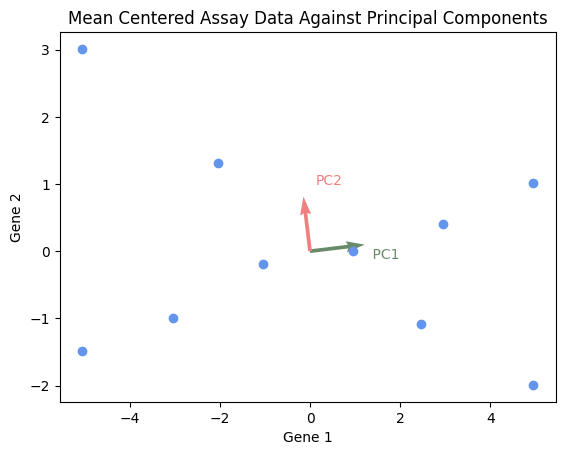

In [13]:
# function to subract mean (used in other questions as well)
def subtract_mean(mat):

    # get mean
    mat_mean = np.mean(mat, axis = 1)

    # initialize the mean centered matrix with the same shape as the uncentered
    mc_mat = np.zeros(mat.shape)

    # loop through uncentered matrix, subracting the appropriate mean from each value and replacing in mc_mat 
    for i, j in enumerate(mat):
        for k, l in enumerate(j):
            mc_mat[i, k] = l - mat_mean[i]

    return mc_mat

Y = subtract_mean(X)

# generate covariance matrix of Y
C = np.cov(Y)

# generate eigenvalues/eigenvectors for covariance matrix
evals, evecs = np.linalg.eig(C)

# sort the eigenvectors according to eigenvalue
sort_idx = evals.argsort()[::-1]
evals = evals[sort_idx]
evecs = evecs[:,sort_idx]

print(f'PC1 = {evecs[:,0]}\nPC2 = {evecs[:,1]}\nLambda1 = {evals[0]}\nLambda2 = {evals[1]}')

print(f'The first principal component of C accounts for about {(evals[0] / np.sum(evals)) * 100:.2f}% of total variance.')

plt.plot(Y[0, :], Y[1, :], 'o', color = 'cornflowerblue')

# HINT: use the quiver function to plot the vector directions
origin = [0,0]
vec1 = evecs[:,0]
vec2 = evecs[:,1]
plt.quiver(origin, origin, vec1, vec2, color=['#698B69','#F08080'], scale = 9)
plt.annotate('    PC1', xy=(vec1[0],vec1[1]), color = '#698B69')
plt.annotate('PC2', xy=(vec2[0],vec2[1]), color = '#F08080')
plt.title('Mean Centered Assay Data Against Principal Components')
plt.xlabel('Gene 1')
plt.ylabel('Gene 2')
plt.show()

In [ ]:
# NOTE: Hint on the percentage of variance representation
    
    

#### Question 2.1
* Re-express the gene-assay matrix X as a principal component-assay matrix by projecting each data point (column) onto the PCs.
* Plot the reprojected data

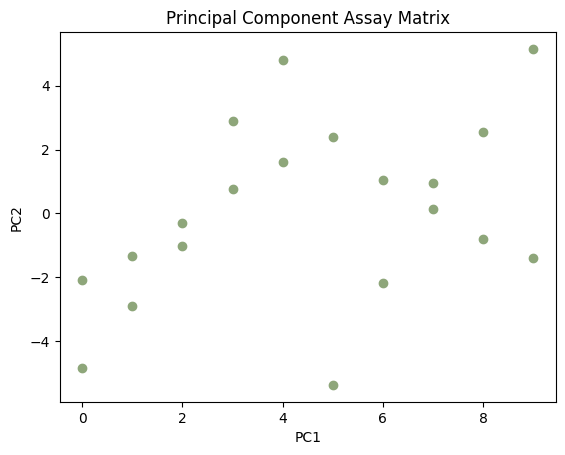

In [14]:

Y_reproj = np.dot(Y.T, evecs)
plt.plot(Y_reproj, 'o', color = '#8ea67a')
plt.title('Principal Component Assay Matrix')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Question 2.2
* For each principal component (row) of the new matrix plot the data as a time series for each block of assays (the first five columns and the second five columns).
* What can you say about the responses of cells to the two assays, heat shock and shift from glucose to glycerol?

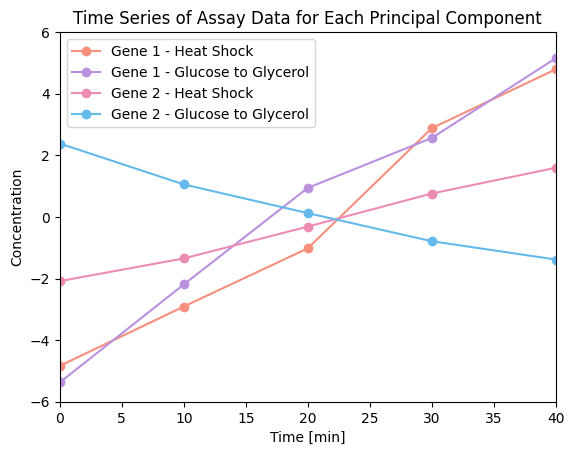

In contrast to the time series of assay data plotted before the PCA was performed, we see here that the response of cells of the two genes is more clearly visible and reduced in noise. By performing PCA, we have effectively reduced the dimensionality of the data and thus, have a more accurate representation of the correlation between the responses of the cells (per gene) to the change in conditions.


In [10]:
Y_reproj_split = np.array([Y_reproj.T[0,:5], Y_reproj.T[0,5:], Y_reproj.T[1,:5], Y_reproj.T[1,5:]])

# define time for the x-axis using new parameters
time = np.linspace(0, 40, 5)

# plot all four sets of data
plt.plot(time, Y_reproj_split[0, :], '-o', color = '#f68f7d')
plt.plot(time, Y_reproj_split[1, :], '-o', color = '#ba91df')
plt.plot(time, Y_reproj_split[2, :], '-o', color = '#ed8cb3')
plt.plot(time, Y_reproj_split[3, :], '-o', color = '#64baeb')

plt.title('Time Series of Assay Data for Each Principal Component')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.xlim((0,40))
plt.ylim((-6,6))
plt.legend(['Gene 1 - Heat Shock', 'Gene 1 - Glucose to Glycerol', 'Gene 2 - Heat Shock', 'Gene 2 - Glucose to Glycerol'])
plt.show()

print('In contrast to the time series of assay data plotted before the PCA was performed, we see here that the response of cells of the two genes is more clearly visible and reduced in noise. By performing PCA, we have effectively reduced the dimensionality of the data and thus, have a more accurate representation of the correlation between the responses of the cells (per gene) to the change in conditions.')


#### Question 3: PCA on uncentered data
Let’s see the difference between finding the principal components of uncentered vs. centered data. Imagine you have the following data matrix X2.

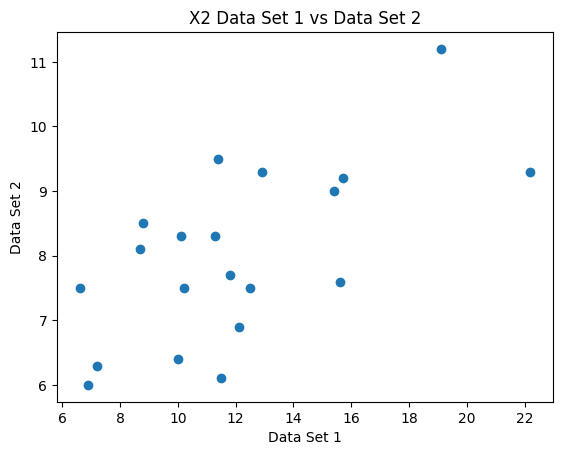

In [15]:
X2 = np.array([[12.1, 6.6, 11.5, 8.7, 15.4, 6.9, 8.8, 10.1, 19.1, 15.6, 22.2, 10.2, 15.7, 10.0, 7.2, 11.8, 11.3, 12.5, 11.4, 12.9],
               [6.9, 7.5, 6.1, 8.1, 9.0, 6.0, 8.5, 8.3, 11.2, 7.6, 9.3, 7.5, 9.2, 6.4, 6.3, 7.7, 8.3, 7.5, 9.5, 9.3]])


plt.scatter(X2[0,:], X2[1,:])
plt.title('X2 Data Set 1 vs Data Set 2')
plt.xlabel('Data Set 1')
plt.ylabel('Data Set 2')
plt.show()

Numpy's built-in covariance function mean-centers the data automatically. Another way of calculating the covariance matrix is multiply it with its own transpose and divide by the number of observations. I have implemented this function as `Cov_wo_meancentering(X)` below. It should give the same result as `np.cov` with the arguments `rowvar=False, bias=True` if centering is also implemented. 

In [16]:
def Cov_wo_meancentering(X):
    X = X.T
    lenX = X.shape[0]
    covariance = X.T.dot(X)/lenX
    return covariance

np.cov(X2)

array([[16.05578947,  3.46052632],
       [ 3.46052632,  1.79042105]])

* Without centering, i.e. mean subtracting, the data, find the covariance matrix of X2.
* Find the eigenvalues and eigenvectors of the covariance matrix. Reorder youreigenvectors and eigenvalues so that the eigenvector with the highest eigenvalue is in the first column.
* Transform the data X2 into the principal component space and plot each point, show your plot.
* Now redo the previous three steps, but subtract the mean of each dimension from all of the data points how is it different?

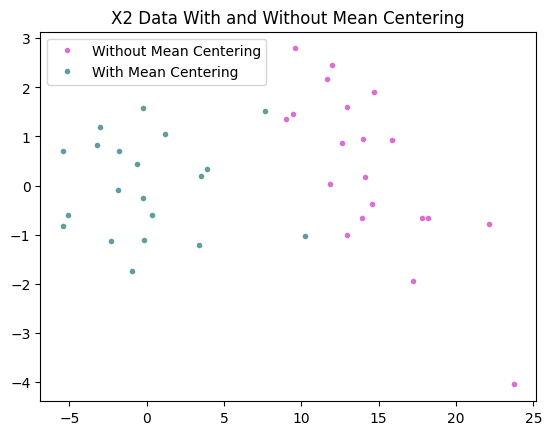

The data plotted without mean centering shows a bias towards the origin, as the variance of the data is not spread equally in all directions. In contrast, data plotted with mean centering displays a more even distribution of points, which results in a more accurate representation of the data.


In [18]:
## plot data without mean centering

# generate covariance matrix of X2 using Cov_wo_meancentering
C_X2 = Cov_wo_meancentering(X2)

# generate eigenvalues/eigenvectors for covariance matrix of X2
evals_X2, evecs_X2 = np.linalg.eig(C_X2)

# sort the eigenvectors according to eigenvalue
sort_idx = evals_X2.argsort()[::-1]
evals_X2 = evals_X2[sort_idx]
evecs_X2 = evecs_X2[:,sort_idx]

# reproject onto PCs
X2_reproj = np.transpose(evecs_X2) @ X2

# plot data
plt.plot(X2_reproj[0,:], X2_reproj[1,:], '.', color = 'orchid', label='Without Mean Centering')

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------ß

## plot mean centered data

# subract mean
X2mc = subtract_mean(X2)

# generate covariance matrix of mean centered X2
C_X2mc = np.cov(X2mc)

# generate eigenvalues/eigenvectors for mean centered covariance matrix of X2
evals_X2mc, evecs_X2mc = np.linalg.eig(C_X2mc)

# sort the eigenvectors according to eigenvalue
sort_idx = evals_X2mc.argsort()[::-1]
evals_X2 = evals_X2mc[sort_idx]
evecs_X2 = evecs_X2mc[:,sort_idx]

# reproject onto PCs
X2_reproj_mc = np.transpose(evecs_X2mc) @ X2mc

# plot data
plt.plot(X2_reproj_mc[0,:], X2_reproj_mc[1,:], '.', color = 'cadetblue', label='With Mean Centering')
plt.title('X2 Data With and Without Mean Centering')
plt.legend()
plt.show()

print('The data plotted without mean centering shows a bias towards the origin, as the variance of the data is not spread equally in all directions. In contrast, data plotted with mean centering displays a more even distribution of points, which results in a more accurate representation of the data.')

#### Question 4: PCA in High dimensions

Download and load the gene expression matrix X `X = np.load('geneExpressionMat_X.npy')`

X is a truncated gene expression matrix of the first 2000 genes across 8 days of sampling the fibroblast response to ectopic expression of transcription factors Oct4, Sox2, Klf4, c-Myc. These factors are called the Yamanaka Factors after [Shinya Yamanaka](https://en.wikipedia.org/wiki/Shinya_Yamanaka) who won a nobel prize for his discovery.  They enabled the creation of [induced pluripotent stem cells](https://en.wikipedia.org/wiki/Induced_pluripotent_stem_cell) which are dedifferentiated, somatic cells that are of enormous experimental value for their use in creating all cell types of the body. 

In this data set, the columns of X are replicates of the reprogramming process in the following order counted in days `[0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`.
 
* Mean center X by its genes (rows)
* Find the covariance matrix of X (This may take a minute to run and is a small taste of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* Sort the eigenvalues and eigenvectors and plot their real part with the Y axis being log scale `plt.semilogy(evals.real)`

* Reproject the data back onto to first two principal components and plot the experiments (originally the columns) on PC1 vs PC2.

* What type of variance does PC1 capture about the experiment? what about PC2?

Hint: Color each point by its day in the experiment.

`group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`
`plt.scatter(` some array`,` another array`, c=group, label=group,s=80)`

*See the **appendix** below for info on data munging*


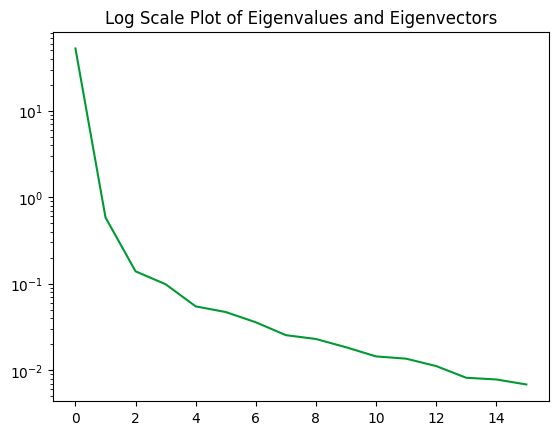

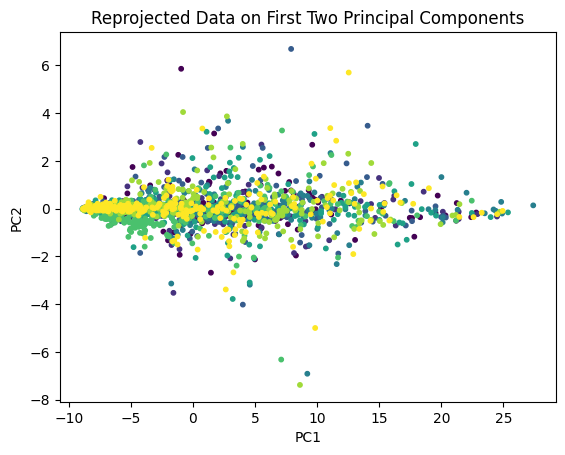

Variance captured by PC1: 97.98%
Variance captured by PC2: 1.09%


In [19]:
# Load data
X = np.load('geneExpressionMat_X.npy')

# mean center X by rows
X_mean = X - np.mean(X, axis=0)

# find covariance matrix of X
cov_mat = np.cov(X_mean, rowvar=False)

# sort the eigenvalues and eigenvectors and plot real components
evals, evecs = np.linalg.eig(cov_mat)
sort_idx = evals.argsort()[::-1]
evals = evals[sort_idx]
evecs = evecs[:,sort_idx]

plt.semilogy(evals.real, '-', color = '#009933')
plt.title('Log Scale Plot of Eigenvalues and Eigenvectors')
plt.show()

# reproject the data back onto the first two principal components
X_reproj = np.dot(X_mean, evecs[:, :2])

# plot the columns on PC1 vs PC2
group = np.concatenate([[0] * 250, [1] * 250, [2] * 250, [3] * 250, [4] * 250, [5] * 250, [6] * 250, [7] * 250], axis=0)

plt.scatter(X_reproj[:, 0], X_reproj[:, 1], c=group, label='viridis', s=10)
plt.title('Reprojected Data on First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# variance captured by PC1 and PC2
print(f'Variance captured by PC1: {(evals[0] / np.sum(evals)) * 100:.2f}%')
print(f'Variance captured by PC2: {(evals[1] / np.sum(evals)) * 100:.2f}%')


#### Question 5: SVD on Images
Read in the following the `Leopard_Spots.png` image into your python enviornment using the code provided below.

* Perform a singular value decomposition on this image to get U, D, and V-transpose. 

* Make a semilogy plot of the ranked singular values

* Reconstruct an approximation of the image using 1, 2, 4, 8, 16, and 32 of the singular values.

* Dot-indexing a numpy array using the .nbytes call will return the number of bytes required to store a numpy array. Calculate the number of bytes to store the the full U, D, and V-transpose matrices. How much memory can you save by using the first 32 singular values?




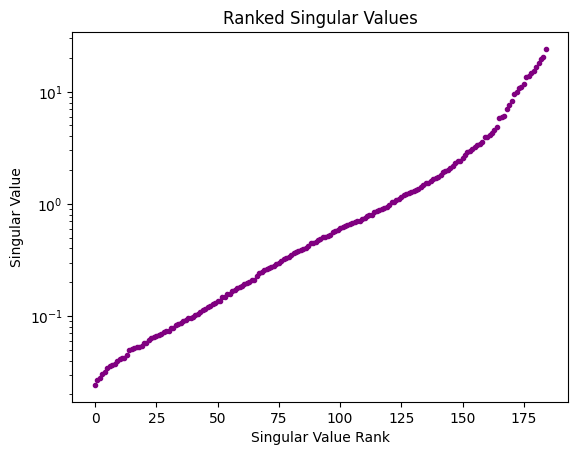

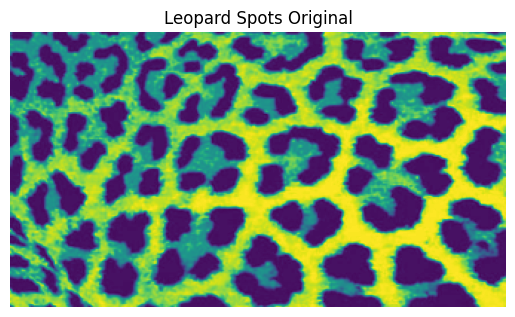

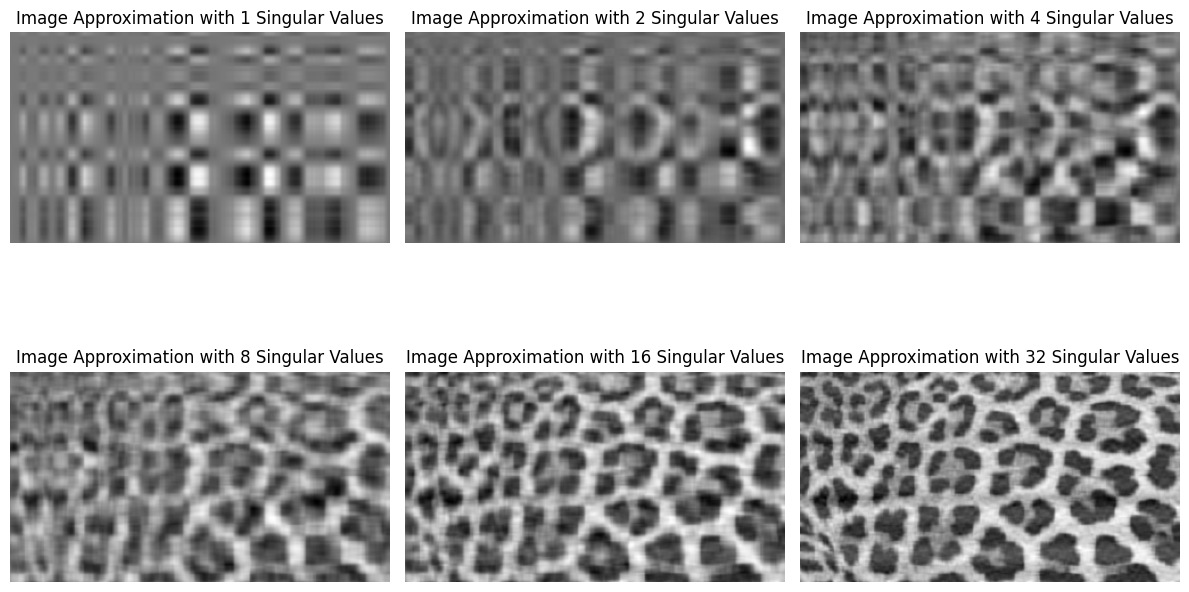

Memory saved using the first 32 singular values: 1010.36 KB


In [21]:
# read image
im = plt.imread('Leopard_Spots.png')

# convert RGB image to grayscale
im = np.mean(im,-1)

# convert image to array
im_arr = np.array(im)

# mean center array
im_mc = subtract_mean(im_arr)

# U, S, and V calculated using numpy (more accurate than the approximation commented out below, wasn't sure if I was allowed to use this function or not)
U, S, V = np.linalg.svd(im_mc)

# # evaluate the covariance matrix
# im_cov = np.cov(im_mc)ß

# # evlauate eigenvalues and eigenvectors
# evals, evecs = np.linalg.eig(im_cov)

# # sort eigenvectors based on eigenvalues
# sort_idx = evals.argsort()[::-1]
# evals = evals[sort_idx]
# evecs = evecs[:,sort_idx]

# # evaluate U, S, and V
# U = evecs
# S = np.sqrt(evals)
# V = U.T

# plot ranked singular values
plt.semilogy(S[::-1], '.', c='#800080')
plt.xlabel('Singular Value Rank')
plt.ylabel('Singular Value')
plt.title('Ranked Singular Values')
plt.show()

# Show the plot
plt.show()
plt.axis('off')
plt.title('Leopard Spots Original')
plt.imshow(im)


# set number of singular values to loop through
n = [1, 2, 4, 8, 16, 32]

# Create figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each approximation in separate subplot
for i, j in enumerate(axs.flatten()):
    S_split = np.diag(S[:n[i]])
    im_approx = U[:, :n[i]] @ S_split @ V[:n[i], :]
    j.imshow(im_approx, cmap='gray')
    j.set_title(f'Image Approximation with {n[i]} Singular Values')
    j.axis('off')

plt.tight_layout()
plt.show()

# calculate size of full U, D, and V
full_U, full_S, full_V = U.nbytes, S.nbytes, V.nbytes
full_size = full_U + full_S + full_V

# calculate size of approximation using first 32 singular values
U_app, S_app, V_app = U[:,:32], S[:32], V[:,:32]
U_app_size, S_app_size, V_app_size = U_app.nbytes, S_app.nbytes, V_app.nbytes
app_size = U_app_size + S_app_size + V_app_size

# calculate memory saved
memory_saved = full_size - app_size
print(f'Memory saved using the first 32 singular values: {memory_saved/1024:.2f} KB')

#### Question 6: Differentiating between normal and cancerous cells (extra credit, not optional for grads)

PCA is a very important technique for finding fundamental differences between normal and cancerous cells. 
Download and import the `ovariancancer_obs.csv` dataset which contains gene data for 216 patients, 121 of whom have ovarian cancer and 95 of whom do not. For each patient there is a vector of data containing the expression of 4000 genes. The `ovariancancer_grp.csv` file contains the labels for the observations matrix. 

Perform a PCA on the observation. Reproject the data on the first 3 principal components and plot them while labeling the points as cancerous or normal. What principal component captures the variance that differentiates cancer from normal tissue?



#### Appendix
Methods for downloading and munging gene expression datasets from the Gene Expression Omnibus 

Open a terminal and type `pip install GEOparse` to install the package onto your computer

Go to the [GEO database website](https://www.ncbi.nlm.nih.gov/sites/GDSbrowser) and browse through the datasets to find a unique ID.

In [ ]:
import GEOparse
import pandas as pd

# Downloading data set from the internet
gds = GEOparse.get_GEO(geo="GDS5316", destdir="./")
gds.metadata # see metadate

In [ ]:
#Explore the data
gds.columns #See columns of the experiment
gds.table #See datatable

In [ ]:
#Subset the data on the columns that you are interested in analyzing
cols = ['GSM943794','GSM943796','GSM943798','GSM943800','GSM943802','GSM943804','GSM943806','GSM943808',]
data = gds.table[cols]

#Remove rows with NaN - missing values
data = data.dropna()

#Convert to a numpy array for further analysis
X = data.to_numpy()